In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import copy
import random
import time
import itertools

#Plotting
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

#systems
# from ANCR_v2 import *
# from ANCR_v3 import *
#from ANCR_v4 import *
from ANCR_v4_3 import *

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


components {'c1': {'loc': {(0, 0, 0): 1.0}, 'i': {(0, 0, 0): 0.0}, 'r': {(0, 0, 0): 1.0}, 'ph': {(0, 0, 0): [0.5, 0.5]}, 'h': {(0, 0, 0): [1.0, 1.0]}}, 'c2': {'loc': {(2, 0, 2): 0.25, (2, 0, 1): 0.75}, 'i': {(2, 0, 2): 0.0, (2, 0, 1): 0.0}, 'r': {(2, 0, 2): 1.0, (2, 0, 1): 1.0}, 'ph': {(2, 0, 2): [0.5, 0.5], (2, 0, 1): [0.5, 0.5]}, 'h': {(2, 0, 2): [1.0, 1.0], (2, 0, 1): [1.0, 1.0]}}, 'cu': {'loc': {(2, 0, 0): 'un', (0, 0, 2): 'un'}, 'i': {(2, 0, 0): 0.0, (0, 0, 2): 0.0}, 'r': {(2, 0, 0): 1.0, (0, 0, 2): 1.0}, 'ph': {(2, 0, 0): [0.5, 0.5], (0, 0, 2): [0.5, 0.5]}, 'h': {(2, 0, 0): [1.0, 1.0], (0, 0, 2): [1.0, 1.0]}}}
systems ['Blue', 'Red']
Blue DiGraph with 3 nodes and 2 edges
Red DiGraph with 2 nodes and 1 edges
[0, 1, 2, 5, 6, 8, 4, 7, 9, 3, (0, 1), (0, 2), (1, 4), (1, 5), (2, 5), (2, 6), (5, 7), (5, 8), (6, 8), (3, 6), (8, 9), (4, 7), (3, 4), (7, 9)]
{(0, 0, 0): 1.0} {(2, 0, 0): 0.4999999999999998, (0, 0, 2): 0.4999999999999998}
[0, 1, 2, 5, 6, 8, 4, 7, 9, 3, (0, 1), (0, 2), (1, 4),

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

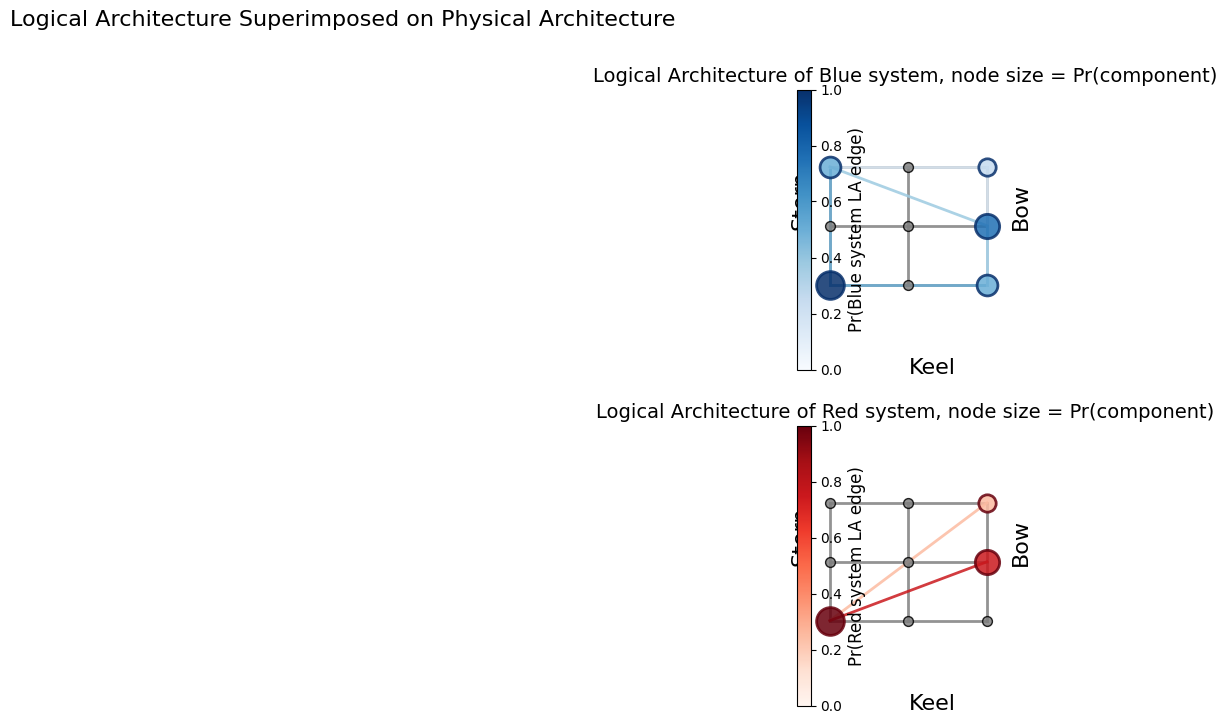

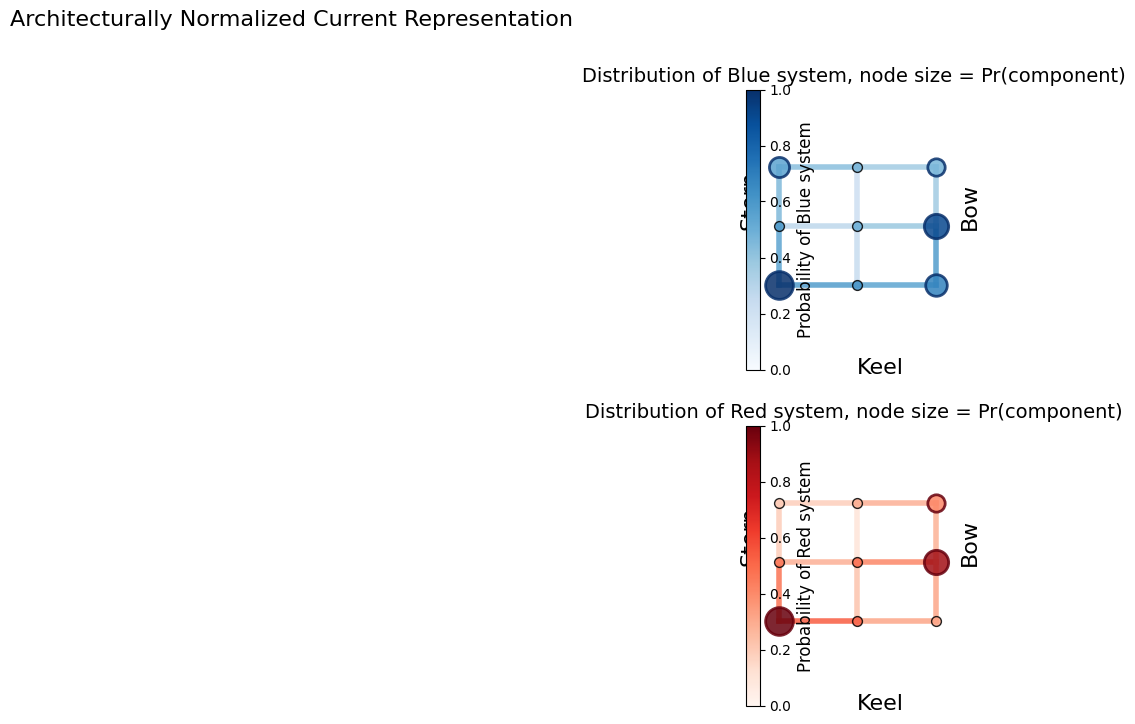

In [2]:
# Physical Architecture
g = nx.grid_graph(dim=[3, 1, 3])

# Logical Architecture
la = {}
la['components'] = {}
la['systems'] = []

# components
c1 = {(0, 0, 0): 1.0}
la['components']['c1'] = {}
la['components']['c1']['loc'] = c1

c2 = {(2, 0, 2): .25, (2, 0, 1): .75}
la['components']['c2'] = {}
la['components']['c2']['loc'] = c2

cu = {(2, 0, 0): 'un', (0, 0, 2): 'un'}  # ,(1,0,0):'un'}
la['components']['cu'] = {}
la['components']['cu']['loc'] = cu

# systems
# power
p = nx.DiGraph()
p.add_node('c1', loc=la['components']['c1']['loc'])
p.add_node('c2', loc=la['components']['c2']['loc'])
p.add_node('cu', loc=la['components']['cu']['loc'])
p.add_edges_from([('c1', 'cu'), ('cu', 'c2')])
#print(p.nodes.data())
la['Blue'] = p
la['systems'].append('Blue')

# cooling
c = nx.DiGraph()
c.add_node('c1', loc=la['components']['c1']['loc'])
c.add_node('c2', loc=la['components']['c1']['loc'])
c.add_edges_from([('c2', 'c1')])
la['Red'] = c
la['systems'].append('Red')

# add unique physical architecture to each edge
ph_ini = 0.5
num_obj = 2
for sys, net in la.items():
    if sys not in la['systems']:
        continue
    for j, k in net.edges():
        # print j,k
        # create unique phyical network for that edge
        g_edge = nx.Graph()
        for a, b in g.edges():
            # print a,b
            i = 0.0  # current
            r = 1.0  # resistance
            ph = [ph_ini for x in range(num_obj)]  # pheromone
            h = [1.0 for x in range(num_obj)]  # heuristic
            g_edge.add_edge(a, b, i=i, r=r, ph=ph, h=h)  # add edge with data

        for n in g.nodes():
            g_edge.nodes[n]['i'] = 0.0  # set current for nodes
            ph = [ph_ini for x in range(num_obj)]  # pheromone
            h = [1.0 for x in range(num_obj)]  # heuristic
            g_edge.nodes[n]['ph'] = ph
            g_edge.nodes[n]['h'] = h
        net[j][k]['g'] = g_edge
for comp in la['components']:
    # assign current, pheromones, resistances and heuristics to component locations
    la['components'][comp]['i'] = {}
    la['components'][comp]['r'] = {}
    la['components'][comp]['ph'] = {}
    la['components'][comp]['h'] = {}
    for l in la['components'][comp]['loc']:
        la['components'][comp]['i'][l] = 0.0
        la['components'][comp]['r'][l] = 1.0
        la['components'][comp]['ph'][l] = [ph_ini for x in range(num_obj)]  # pheromone
        la['components'][comp]['h'][l] = [1.0 for x in range(num_obj)]  # heuristic

# test changing r
# la['components']['cu']['r'][(2,0,0)]=1E-10

ir_la = i_ANCR(g, la)
g_i = project_current_distribution_bus(g, ir_la)

plot=True
if plot:
    plot_setups(g, la, scale=.5, elev=0, angle=-90, factor=2.0)
    plot_current(g_i, ir_la, scale=.5, elev=0, angle=-90, factor=2.0)


In [3]:
E_list=[]
for sys in ir_la['systems']:
    for i,j in ir_la[sys].edges():
        E_list.append((i,j,sys))
print(E_list)

p=i_mapping(g,ir_la,E_list)
print(p)


[('c1', 'cu', 'Blue'), ('cu', 'c2', 'Blue'), ('c2', 'c1', 'Red')]
[0, 1, 2, 4, 5, 7, 3, 6, 8, (0, 1), (0, 2), (1, 3), (1, 4), (2, 4), (2, 5), (4, 6), (4, 7), (5, 7), (7, 8), (3, 6), (6, 8)]
[0, 1, 2, 4, 5, 7, 3, 6, 8, (0, 1), (0, 2), (1, 3), (1, 4), (2, 4), (2, 5), (4, 6), (4, 7), (5, 7), (7, 8), (3, 6), (6, 8)]
[0, 1, 2, 4, 5, 7, 3, 6, 8, (0, 1), (0, 2), (1, 3), (1, 4), (2, 4), (2, 5), (4, 6), (4, 7), (5, 7), (7, 8), (3, 6), (6, 8)]
[0, 1, 2, 4, 5, 7, 3, 6, 8, (0, 1), (0, 2), (1, 3), (1, 4), (2, 4), (2, 5), (4, 6), (4, 7), (5, 7), (7, 8), (3, 6), (6, 8)]
[0, 1, 2, 4, 5, 7, 3, 6, 8, (0, 1), (0, 2), (1, 3), (1, 4), (2, 4), (2, 5), (4, 6), (4, 7), (5, 7), (7, 8), (3, 6), (6, 8)]
[0, 1, 2, 4, 5, 7, 3, 6, 8, (0, 1), (0, 2), (1, 3), (1, 4), (2, 4), (2, 5), (4, 6), (4, 7), (5, 7), (7, 8), (3, 6), (6, 8)]
[0, 1, 2, 4, 5, 7, 3, 6, 8, (0, 1), (0, 2), (1, 3), (1, 4), (2, 4), (2, 5), (4, 6), (4, 7), (5, 7), (7, 8), (3, 6), (6, 8)]
[0, 1, 2, 4, 5, 7, 3, 6, 8, (0, 1), (0, 2), (1, 3), (1, 4), (2, 4)

In [4]:
data_e={}
data_e['edges']=[x for x in g_i.edges()]
data_e['M(Red)']=[d['Red'] for i,j,d in g_i.edges(data=True)]
data_e['M(Blue)']=[d['Blue'] for i,j,d in g_i.edges(data=True)]
data_e['M(S)']=[p[(i,j)] for i,j,d in g_i.edges(data=True)]

df_e=pd.DataFrame(data_e)
df_e=df_e.set_index('edges')
print(df_e)

data_n={}
data_n['nodes']=[x for x in g_i.nodes()]
data_n['M(Red)']=[d['Red'] for n,d in g_i.nodes(data=True)]
data_n['M(Blue)']=[d['Blue'] for n,d in g_i.nodes(data=True)]
data_n['M(S)']=[p[n] for n,d in g_i.nodes(data=True)]

df_n=pd.DataFrame(data_n)
df_n=df_n.set_index('nodes')
print(df_n)


                         M(Red)   M(Blue)      M(S)
edges                                              
((0, 0, 0), (1, 0, 0))  0.53125  0.576451  0.801438
((0, 0, 0), (0, 0, 1))  0.46875  0.545201  0.758330
((0, 0, 1), (1, 0, 1))  0.28125  0.276925  0.480010
((0, 0, 1), (0, 0, 2))  0.18750  0.451730  0.554118
((0, 0, 2), (1, 0, 2))  0.18750  0.423828  0.530866
((1, 0, 0), (2, 0, 0))  0.31250  0.539900  0.683443
((1, 0, 0), (1, 0, 1))  0.21875  0.243164  0.408651
((1, 0, 1), (2, 0, 1))  0.40625  0.384626  0.627610
((1, 0, 1), (1, 0, 2))  0.09375  0.215820  0.287557
((1, 0, 2), (2, 0, 2))  0.28125  0.359375  0.525594
((2, 0, 0), (2, 0, 1))  0.31250  0.574498  0.706508
((2, 0, 1), (2, 0, 2))  0.28125  0.365234  0.528524
            M(Red)   M(Blue)      M(S)
nodes                                 
(0, 0, 0)  1.00000  1.000000  1.000000
(0, 0, 1)  0.46875  0.592285  0.783398
(0, 0, 2)  0.18750  0.545898  0.630412
(1, 0, 0)  0.53125  0.630580  0.826788
(1, 0, 1)  0.50000  0.500279  0.750140

In [5]:
for c in ir_la['components']:
    print(c, ir_la['components'][c]['i'])


c1 {(0, 0, 0): 1.0}
c2 {(2, 0, 2): 0.25, (2, 0, 1): 0.75}
cu {(2, 0, 0): 0.5535714285714286, (0, 0, 2): 0.4464285714285714}


In [6]:
for c in ir_la['components']:
    print(c, ir_la['components'][c]['i'])


c1 {(0, 0, 0): 1.0}
c2 {(2, 0, 2): 0.25, (2, 0, 1): 0.75}
cu {(2, 0, 0): 0.5535714285714286, (0, 0, 2): 0.4464285714285714}


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

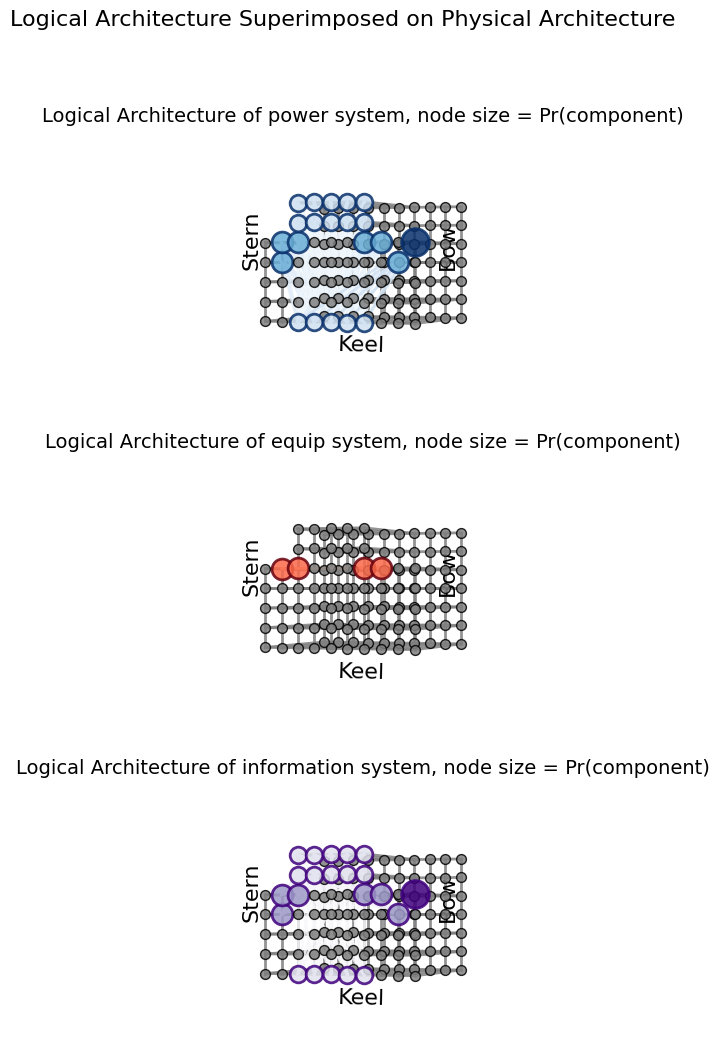

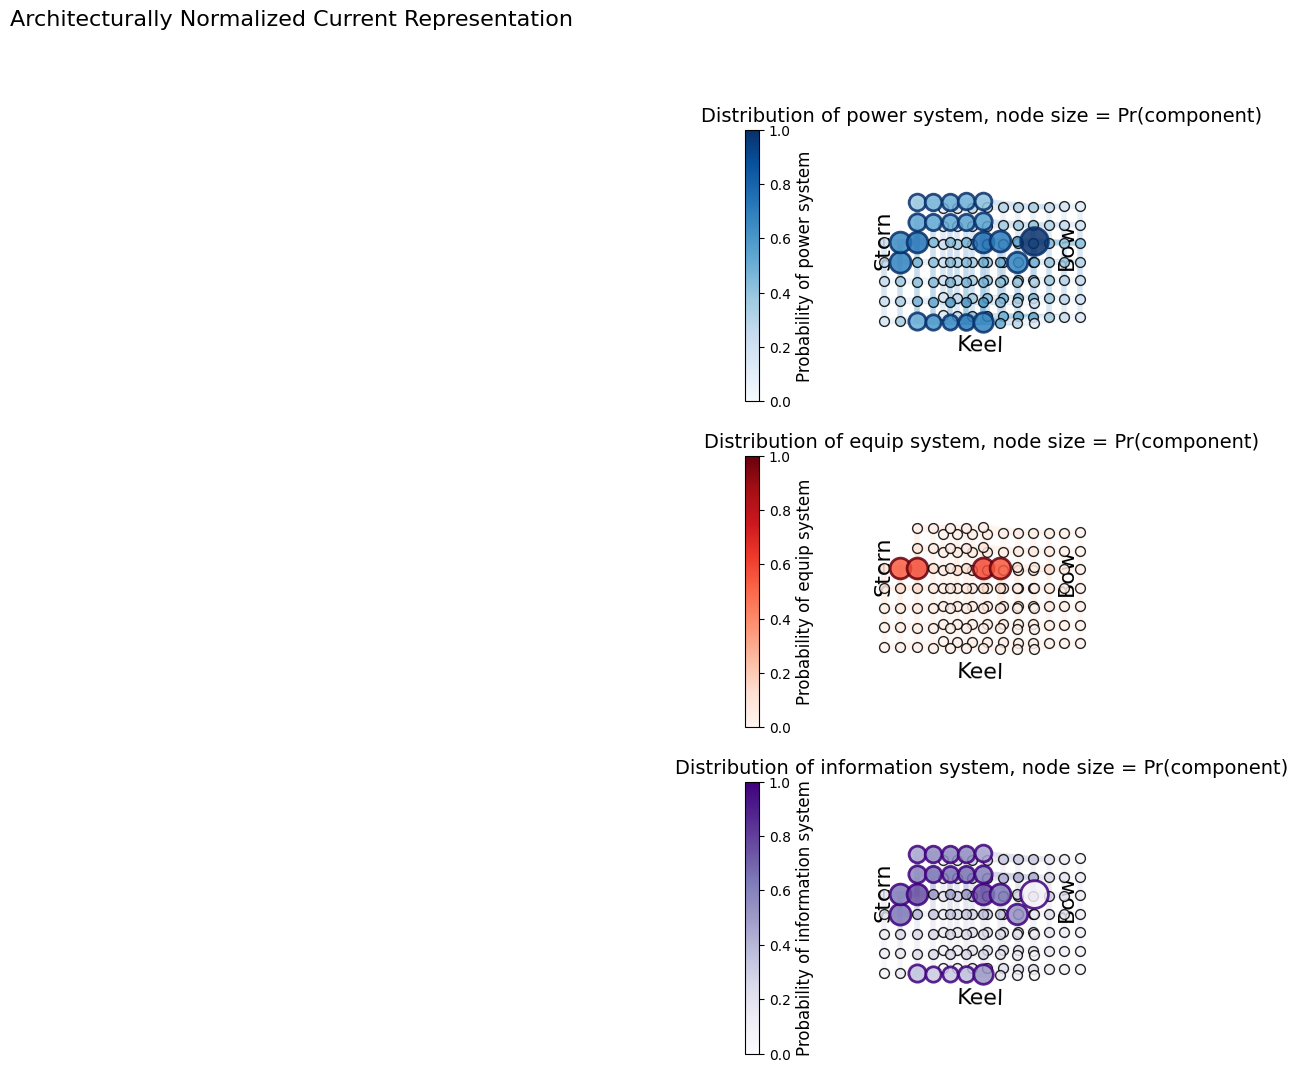

In [3]:
"""
Define Physical and logical architectures for van Oers
"""

#Physical
#g=nx.grid_graph(dim=[10,1,7])
g=nx.grid_graph(dim=[7,2,10])
g.remove_nodes_from([(0,0,5),(0,0,6),(1,0,5),(1,0,6),(7,0,5),(7,0,6),(8,0,5),(8,0,6),(9,0,5),(9,0,6)])
# print nx.is_connected(g)

#Components and locations - first configuration
pp={(2,0,0):0.0,(3,0,0):0.0,(4,0,0):0.0,(5,0,0):1.0,(6,0,0):0.0}
VLS={(8,0,3):1.0,(1,0,3):0.0}
bridge={(2,0,5):0.0,(3,0,5):0.0,(4,0,5):0.0,(5,0,5):0.0,(6,0,5):1.0}
fdeck={(1,0,4):1.0,(2,0,4):0.0,(6,0,4):0.0,(7,0,4):0.0}
hangar={(3,0,4):1.0,(4,0,4):0.0,(5,0,4):0.0,}
radar={(2,0,6):0.0,(3,0,6):0.0,(4,0,6):0.0,(5,0,6):1.0,(6,0,6):0.0}
gun={(8,0,4):1.0,(9,0,4):0.0}

#Swtiched
s_bridge={(2,0,5):1.0,(3,0,5):0.0,(4,0,5):0.0,(5,0,5):0.0,(6,0,5):0.0}
s_fdeck={(1,0,4):0.0,(2,0,4):0.0,(6,0,4):1.0,(7,0,4):0.0}
s_VLS={(8,0,3):0.0,(1,0,3):1.0}

#Components and unknown
# u_pp={(2,0,0):'un',(3,0,0):'un',(4,0,0):'un',(5,0,0):'un',(6,0,0):'un'}
# u_VLS={(8,0,3):'un',(1,0,3):'un'}
# u_bridge={(2,0,5):'un',(3,0,5):'un',(4,0,5):'un',(5,0,5):'un',(6,0,5):'un'}
# u_fdeck={(1,0,4):'un',(2,0,4):'un',(6,0,4):'un',(7,0,4):'un'}
# u_hangar={(3,0,4):'un',(4,0,4):'un',(5,0,4):'un'}
# u_radar={(2,0,6):'un',(3,0,6):'un',(4,0,6):'un',(5,0,6):'un',(6,0,6):'un'}
# u_gun={(8,0,4):'un',(9,0,4):'un'}

u_pp={(2,0,0):'un',(3,0,0):'un',(4,0,0):'un',(5,0,0):'un',(6,0,0):'un'}
u_VLS={(8,0,3):'un',(1,0,3):'un'}
u_bridge={(2,0,5):'un',(3,0,5):'un',(4,0,5):'un',(5,0,5):'un',(6,0,5):'un'}
# u_fdeck={(1,0,4):'un',(2,0,4):'un',(6,0,4):'un',(7,0,4):'un'}
u_fdeck={(1,0,4):'un',(7,0,4):'un'}
u_hangar={(2,0,4):'un',(6,0,4):'un'}
u_radar={(2,0,6):'un',(3,0,6):'un',(4,0,6):'un',(5,0,6):'un',(6,0,6):'un'}
u_gun={(9,0,4):'un'}



#Logical
la={}

#Define components
la['components']={}

#Power plant
la['components']['propulsion plant']={}
la['components']['propulsion plant']['loc']=u_pp

#Vertical Launch System
la['components']['VLS']={}
la['components']['VLS']['loc']=u_VLS

#Bridge
la['components']['bridge']={}
la['components']['bridge']['loc']=u_bridge

#Flight Deck
la['components']['flight deck']={}
la['components']['flight deck']['loc']=u_fdeck

#Hangar
la['components']['hangar']={}
la['components']['hangar']['loc']=u_hangar

#Radar
la['components']['radar mast']={}
la['components']['radar mast']['loc']=u_radar

#Gun
la['components']['fwd. gun']={}
la['components']['fwd. gun']['loc']=u_gun



#Logical systems
la['systems']=[]

#power
la['systems'].append('power')

p=nx.DiGraph()
p.add_node('propulsion plant',loc=la['components']['propulsion plant']['loc'])
p.add_node('VLS',loc=la['components']['VLS']['loc'])
p.add_node('bridge',loc=la['components']['bridge']['loc'])
p.add_node('flight deck',loc=la['components']['flight deck']['loc'])
p.add_node('hangar',loc=la['components']['hangar']['loc'])
p.add_node('radar mast',loc=la['components']['radar mast']['loc'])
p.add_node('fwd. gun',loc=la['components']['fwd. gun']['loc'])

p.add_edges_from([('propulsion plant',x) for x in p.nodes()])
p.remove_edge('propulsion plant','propulsion plant')

la['power']=p



#equipment
la['systems'].append('equip')
e=p.copy()

#e.remove_edges_from(e.edges()) #matt, I think this may spark up an error now in py3 as e.edges() maybe used to be some
#iterable but now its an object so the input now changes on each iteration, changing this to doing this from a copy of a list(e.edges)
a = list(e.edges())
e.remove_edges_from(a)


e.remove_nodes_from(['propulsion plant','VLS','bridge','radar mast','fwd. gun'])
#e.remove_nodes_from(['propulsion plant','VLS','bridge','radar mast'])
e.add_edge('hangar','flight deck')


# print e.nodes(data=True)
# print e.edges(data=True)

la['equip']=e


#information
la['systems'].append('information')
i=p.copy()

a = list(i.edges()) #addition from matt

i.remove_edges_from(a)
#i.remove_edges_from(e.edges())

# i.remove_nodes_from(['propulsion plant'])
#i.add_edges_from([('radar mast','bridge'),('bridge','fwd. gun'),
#                  ('bridge','hangar'),('bridge','flight deck'),
#                  ('bridge','VLS'),('bridge','propulsion plant')])
i.add_edges_from([('radar mast','bridge'),
                  ('bridge','hangar'),('bridge','flight deck'),
                  ('bridge','VLS'),('bridge','propulsion plant')])

la['information']=i

#image
# la['systems'].append('image')
# image=nx.DiGraph()
# la['image']=image

la=setup_LA(g,la)
ir_la = i_ANCR(g, la)
g_i = project_current_distribution_bus(g, ir_la)
plot_setups(g, la, scale=.5, elev=0, angle=-70, factor=2.0)
plot_current(g_i, ir_la, scale=.5, elev=0, angle=-70, factor=2.0)


In [ ]:
print(g_i)
for n in g_i.nodes():
    print(n, g_i.node[n]['power'])
    
for i,j in g_i.edges():
    print((i,j), g_i[i][j]['power'])


In [ ]:
plot_locations2(g_i,
                ir_la,
                ['propulsion plant','bridge','radar mast','hangar','flight deck','VLS','fwd. gun'],
                scale=.5,
                elev=0,
                angle=-90,
                factor=2.0)

In [5]:
"""
Define Physical and logical architectures for van Oers
"""

#Physical
g_bh=nx.grid_graph(dim=[10,1,7])
g_bh.remove_nodes_from([(0,0,5),(0,0,6),(1,0,5),(1,0,6),(7,0,5),(7,0,6),(8,0,5),(8,0,6),(9,0,5),(9,0,6)])

#remove nodes for watertight bulkheads
bh_height=3
rem_list=[]
for i,j in g_bh.edges():
    #check if horizontal edge
    if i[2]==j[2]:
        #check if below bh height
        if i[2]<bh_height:
            rem_list.append((i,j))

g_bh.remove_edges_from(rem_list)
# print nx.is_connected(g)

#Components and locations - first configuration
pp={(2,0,0):0.0,(3,0,0):0.0,(4,0,0):0.0,(5,0,0):1.0,(6,0,0):0.0}
VLS={(8,0,3):1.0,(1,0,3):0.0}
bridge={(2,0,5):0.0,(3,0,5):0.0,(4,0,5):0.0,(5,0,5):0.0,(6,0,5):1.0}
fdeck={(1,0,4):1.0,(2,0,4):0.0,(6,0,4):0.0,(7,0,4):0.0}
hangar={(3,0,4):1.0,(4,0,4):0.0,(5,0,4):0.0,}
radar={(2,0,6):0.0,(3,0,6):0.0,(4,0,6):0.0,(5,0,6):1.0,(6,0,6):0.0}
gun={(8,0,4):1.0,(9,0,4):0.0}

#Swtiched
s_bridge={(2,0,5):1.0,(3,0,5):0.0,(4,0,5):0.0,(5,0,5):0.0,(6,0,5):0.0}
s_fdeck={(1,0,4):0.0,(2,0,4):0.0,(6,0,4):1.0,(7,0,4):0.0}
s_VLS={(8,0,3):0.0,(1,0,3):1.0}

#Components and unknown
# u_pp={(2,0,0):'un',(3,0,0):'un',(4,0,0):'un',(5,0,0):'un',(6,0,0):'un'}
# u_VLS={(8,0,3):'un',(1,0,3):'un'}
# u_bridge={(2,0,5):'un',(3,0,5):'un',(4,0,5):'un',(5,0,5):'un',(6,0,5):'un'}
# u_fdeck={(1,0,4):'un',(2,0,4):'un',(6,0,4):'un',(7,0,4):'un'}
# u_hangar={(3,0,4):'un',(4,0,4):'un',(5,0,4):'un'}
# u_radar={(2,0,6):'un',(3,0,6):'un',(4,0,6):'un',(5,0,6):'un',(6,0,6):'un'}
# u_gun={(8,0,4):'un',(9,0,4):'un'}

u_pp={(2,0,0):'un',(3,0,0):'un',(4,0,0):'un',(5,0,0):'un',(6,0,0):'un'}
u_VLS={(8,0,3):'un',(1,0,3):'un'}
u_bridge={(2,0,5):'un',(3,0,5):'un',(4,0,5):'un',(5,0,5):'un',(6,0,5):'un'}
# u_fdeck={(1,0,4):'un',(2,0,4):'un',(6,0,4):'un',(7,0,4):'un'}
u_fdeck={(1,0,4):'un',(7,0,4):'un'}
u_hangar={(2,0,4):'un',(6,0,4):'un'}
u_radar={(2,0,6):'un',(3,0,6):'un',(4,0,6):'un',(5,0,6):'un',(6,0,6):'un'}
u_gun={(9,0,4):'un'}



#Logical
la={}

#Define components
la['components']={}

#Power plant
la['components']['propulsion plant']={}
la['components']['propulsion plant']['loc']=u_pp

#Vertical Launch System
la['components']['VLS']={}
la['components']['VLS']['loc']=u_VLS

#Bridge
la['components']['bridge']={}
la['components']['bridge']['loc']=u_bridge

#Flight Deck
la['components']['flight deck']={}
la['components']['flight deck']['loc']=u_fdeck

#Hangar
la['components']['hangar']={}
la['components']['hangar']['loc']=u_hangar

#Radar
la['components']['radar mast']={}
la['components']['radar mast']['loc']=u_radar

#Gun
la['components']['fwd. gun']={}
la['components']['fwd. gun']['loc']=u_gun



#Logical systems
la['systems']=[]

#power
la['systems'].append('power')

p=nx.DiGraph()
p.add_node('propulsion plant',loc=la['components']['propulsion plant']['loc'])
p.add_node('VLS',loc=la['components']['VLS']['loc'])
p.add_node('bridge',loc=la['components']['bridge']['loc'])
p.add_node('flight deck',loc=la['components']['flight deck']['loc'])
p.add_node('hangar',loc=la['components']['hangar']['loc'])
p.add_node('radar mast',loc=la['components']['radar mast']['loc'])
p.add_node('fwd. gun',loc=la['components']['fwd. gun']['loc'])

p.add_edges_from([('propulsion plant',x) for x in p.nodes()])
p.remove_edge('propulsion plant','propulsion plant')

la['power']=p



#equipment
la['systems'].append('equip')
e=p.copy()

a = list(e.edges)
#e.remove_edges_from(e.edges())
e.remove_edges_from(a)

e.remove_nodes_from(['propulsion plant','VLS','bridge','radar mast','fwd. gun'])
e.add_edge('hangar','flight deck')


# print e.nodes(data=True)
# print e.edges(data=True)

la['equip']=e


#information
la['systems'].append('information')
i=p.copy()

a = list(i.edges())
#i.remove_edges_from(i.edges())
i.remove_edges_from(a)

# i.remove_nodes_from(['propulsion plant'])
i.add_edges_from([('radar mast','bridge'),('bridge','fwd. gun'),
                  ('bridge','hangar'),('bridge','flight deck'),
                  ('bridge','VLS'),('bridge','propulsion plant')])

la['information']=i

#image
# la['systems'].append('image')
# image=nx.DiGraph()
# la['image']=image

la_bh=setup_LA(g_bh,la)
ir_la_bh = i_ANCR(g_bh, la_bh)
g_i_bh = project_current_distribution_bus(g, ir_la_bh)
plot_setups(g_bh, la_bh, scale=.5, elev=0, angle=-90, factor=2.0)
plot_current(g_i_bh, ir_la_bh, scale=.5, elev=0, angle=-90, factor=2.0)


[(0, 0, 0), (0, 0, 1), (0, 0, 2), (0, 0, 3), (1, 0, 3), (0, 0, 4), (1, 0, 4), (0, 0, 7), (1, 0, 7), (0, 0, 8), (1, 0, 8), (0, 0, 9), (1, 0, 9), (1, 0, 0), (1, 0, 1), (1, 0, 2), (2, 0, 3), (2, 0, 4), (2, 0, 7), (2, 0, 8), (2, 0, 9), (2, 0, 0), (2, 0, 1), (2, 0, 2), (3, 0, 3), (3, 0, 4), (2, 0, 5), (3, 0, 5), (2, 0, 6), (3, 0, 6), (3, 0, 7), (3, 0, 8), (3, 0, 9), (3, 0, 0), (3, 0, 1), (3, 0, 2), (4, 0, 3), (4, 0, 4), (4, 0, 5), (4, 0, 6), (4, 0, 7), (4, 0, 8), (4, 0, 9), (4, 0, 0), (4, 0, 1), (4, 0, 2), (5, 0, 3), (5, 0, 4), (5, 0, 5), (5, 0, 6), (5, 0, 7), (5, 0, 8), (5, 0, 9), (5, 0, 0), (5, 0, 1), (5, 0, 2), (6, 0, 3), (6, 0, 4), (6, 0, 5), (6, 0, 6), (6, 0, 7), (6, 0, 8), (6, 0, 9), (6, 0, 0), (6, 0, 1), (6, 0, 2), 'i_super', (9, 0, 4), 'j_super']
[((0, 0, 0), (0, 0, 1)), ((0, 0, 1), (0, 0, 2)), ((0, 0, 2), (0, 0, 3)), ((0, 0, 3), (1, 0, 3)), ((0, 0, 3), (0, 0, 4)), ((1, 0, 3), (1, 0, 2)), ((1, 0, 3), (2, 0, 3)), ((1, 0, 3), (1, 0, 4)), ((0, 0, 4), (1, 0, 4)), ((1, 0, 4), (2, 0, 4)),

NetworkXError: Graph not connected.

In [ ]:
plot_locations2(g_i_bh,
                ir_la_bh,
                ['propulsion plant','bridge','radar mast','hangar','flight deck','VLS','fwd. gun'],
                scale=.5,
                elev=0,
                angle=-90,
                factor=2.0)

for c in ir_la_bh['components']:
    print(c, ir_la_bh['components'][c]['i'])


In [ ]:
for n in g_i_bh.nodes():
    print(n, g_i_bh.node[n]['power'])
    
for i,j in g_i_bh.edges():
    print((i,j), g_i_bh[i][j]['power'])


In [ ]:
for c in ir_la_bh['components']:
    print(c,ir_la_bh['components'][c]['i'])
    
print('power')
    
targets=[(2,0,0),(3,0,0),(4,0,0),(5,0,0),(6,0,0)]
for i,j in g_i_bh.edges():
    if (i in targets) or (j in targets): 
        print((i,j), g_i_bh[i][j]['power'])

print('information')
for i,j in g_i_bh.edges():
    if (i in targets) or (j in targets): 
        print((i,j), g_i_bh[i][j]['information'])



In [ ]:
for c in ir_la['components']:
    print(c,ir_la['components'][c]['i'])

targets=[(2,0,0),(3,0,0),(4,0,0),(5,0,0),(6,0,0)]
for i,j in g_i.edges():
    if (i in targets) or (j in targets): 
        print((i,j), g_i[i][j]['power'])


In [ ]:
print('high')
targets=[(2,0,1),(3,0,1),(4,0,1),(5,0,1),(6,0,1)]
for i,j in g_i.edges():
    if (i in targets) and (j in targets): 
        print((i,j), g_i[i][j]['power'])

print('low')
targets=[(2,0,0),(3,0,0),(4,0,0),(5,0,0),(6,0,0)]
for i,j in g_i.edges():
    if (i in targets) and (j in targets): 
        print((i,j), g_i[i][j]['power'])


In [ ]:
i_la = i_arrange_g(g, la)
for c in i_la['components']:
    print(c, i_la['components'][c]['i'])


In [ ]:
E_list=i_la['power'].edges()

#Get set of possible location pairs
loc_pairs=set()

#iterate through each component locations to get the possible location pairs
for u,v in E_list:
    u_locs=list(i_la['components'][u]['loc'].keys())
    v_locs=list(i_la['components'][v]['loc'].keys())
    pairs=list(itertools.product(*[u_locs,v_locs]))
    loc_pairs.update(pairs)
    
#print loc_pairs

#get current distributions for each location pair
current_pairs={}
for (x,y) in loc_pairs:
    I=current_st(g,x,y)
    current_pairs[(x,y)]=I
    
# print current_pairs

#get all possible arrangments and their probability
#identify components
components=set(itertools.chain.from_iterable(E_list))
print(components)

#map each component to an index  
index_to_component_map=dict(list(zip(list(range(len(components))),components)))
component_to_index_map=dict((y,x) for x,y in index_to_component_map.items())
print(index_to_component_map)


#use indexes to generate list of lists for component locations
possible_locations=[]
for index in range(len(components)):
    c=index_to_component_map[index]
    possible_locations.append(list(i_la['components'][c]['loc'].keys()))
print(possible_locations)

#get possible combinations of locations
arrangement_list=list(itertools.product(*possible_locations))
#print arrangement_list

#initalize results dictionary
p=dict.fromkeys(g.nodes()+g.edges(),0.0)

#iterate through arrangements to populate results
for n in g.nodes():
    #nodes first
    #iterate through arrangements
    for a in arrangement_list:
        p_arrange=1.0 #get probability of the arrangement a
        for a_index in range(len(a)):
            loc_at_index=a[a_index] #location at the index
            c_at_index=index_to_component_map[a_index] #component at the index
            p_arrange*=i_la['components'][c_at_index]['i'][loc_at_index]
        #print a, p_arrange
        
        #get probability that the element is not used by any logical connection in E
        p_ele_not_used_a=1.0
        for u,v in E_list:
            #get the arrangement's component assignment
            u_index=component_to_index_map[u] #get index in arrangement
            v_index=component_to_index_map[v] #get index in arrangement
            u_loc=a[u_index] #location of u in arrangement
            v_loc=a[v_index] #location of v in arrangement
            
            #get current value for node n
            #first get right key
            if (u_loc,v_loc) in current_pairs:
                key=(u_loc,v_loc)
            else:
                key=(v_loc,u_loc)
            p_ele_not_used_a*=(1.0-current_pairs[key][n]) #assemble probability that node is not used
        
        #get probability the element was used by any logical connection in E
        p_ele_used_a=1.0-p_ele_not_used_a
        
        #weight use by the probability of the arrangement
        p_ele_used=p_ele_used_a*p_arrange
        
        #add probability of use to the results dictionary
        p[n]+=p_ele_used

for i,j in g.edges():
    #nodes first
    #iterate through arrangements
    for a in arrangement_list:
        p_arrange=1.0 #get probability of the arrangement a
        for a_index in range(len(a)):
            loc_at_index=a[a_index] #location at the index
            c_at_index=index_to_component_map[a_index] #component at the index
            p_arrange*=i_la['components'][c_at_index]['i'][loc_at_index]
        #print a, p_arrange
        
        #get probability that the element is not used by any logical connection in E
        p_ele_not_used_a=1.0
        for u,v in E_list:
            #get the arrangement's component assignment
            u_index=component_to_index_map[u] #get index in arrangement
            v_index=component_to_index_map[v] #get index in arrangement
            u_loc=a[u_index] #location of u in arrangement
            v_loc=a[v_index] #location of v in arrangement
            
            #get current value for node n
            #first get right key
            if (u_loc,v_loc) in current_pairs:
                key=(u_loc,v_loc)
            else:
                key=(v_loc,u_loc)
            
            #second get right edge key
            if (i,j) in current_pairs[key]:
                edge_key=(i,j)
            else:
                edge_key=(j,i)
            p_ele_not_used_a*=(1.0-current_pairs[key][edge_key]) #assemble probability that node is not used
        
        #get probability the element was used by any logical connection in E
        p_ele_used_a=1.0-p_ele_not_used_a
        
        #weight use by the probability of the arrangement
        p_ele_used=p_ele_used_a*p_arrange
        
        #add probability of use to the results dictionary
        #get the key
        if (i,j) in p:
            edge_key=(i,j)
        else:
            edge_key=(j,i)
                
        p[edge_key]+=p_ele_used
        
        
# for c in i_la['components']:
#     for loc in i_la['components']['i']:keys()



In [ ]:
#Add systems
sys='equip'
E_list=i_la['equip'].edges()
E_list=[(u,v,sys) for u,v in E_list]


#get all possible arrangments and their probability
#identify components
E_components=[(u,v) for u,v,sys in E_list]
components=set(itertools.chain.from_iterable(E_components))
print(components)

#map each component to an index  
index_to_component_map=dict(list(zip(list(range(len(components))),components)))
component_to_index_map=dict((y,x) for x,y in index_to_component_map.items())
print(index_to_component_map)


#use indexes to generate list of lists for component locations
possible_locations=[]
for index in range(len(components)):
    c=index_to_component_map[index]
    possible_locations.append(list(i_la['components'][c]['loc'].keys()))
print(possible_locations)

#get possible combinations of locations
arrangement_list=list(itertools.product(*possible_locations))
#print arrangement_list

#initalize results dictionary
p=dict.fromkeys(g.nodes()+g.edges(),0.0)

#track generated current matrices
current_tuples={}

#iterate through arrangements to populate results
for n in g.nodes():
    #nodes first
    #iterate through arrangements
    for a in arrangement_list:
        p_arrange=1.0 #get probability of the arrangement a
        for a_index in range(len(a)):
            loc_at_index=a[a_index] #location at the index
            c_at_index=index_to_component_map[a_index] #component at the index
            p_arrange*=i_la['components'][c_at_index]['i'][loc_at_index]
        #print a, p_arrange
        
        #get probability that the element is not used by any logical connection in E
        p_ele_not_used_a=1.0
        for u,v,sys in E_list:
            #get the arrangement's component assignment
            u_index=component_to_index_map[u] #get index in arrangement
            v_index=component_to_index_map[v] #get index in arrangement
            u_loc=a[u_index] #location of u in arrangement
            v_loc=a[v_index] #location of v in arrangement
            

            g_tuple=copy.deepcopy(i_la[sys][u][v]['g'])
            I=current_st(g_tuple,u_loc,v_loc)
            #get current value for node n
            p_ele_not_used_a*=(1.0-I[n]) #assemble probability that node is not used
        
        #get probability the element was used by any logical connection in E
        p_ele_used_a=1.0-p_ele_not_used_a
        
        #weight use by the probability of the arrangement
        p_ele_used=p_ele_used_a*p_arrange
        
        #add probability of use to the results dictionary
        p[n]+=p_ele_used

for i,j in g.edges():
    #nodes first
    #iterate through arrangements
    for a in arrangement_list:
        p_arrange=1.0 #get probability of the arrangement a
        for a_index in range(len(a)):
            loc_at_index=a[a_index] #location at the index
            c_at_index=index_to_component_map[a_index] #component at the index
            p_arrange*=i_la['components'][c_at_index]['i'][loc_at_index]
        #print a, p_arrange
        
        #get probability that the element is not used by any logical connection in E
        p_ele_not_used_a=1.0
        for u,v,sys in E_list:
            #get the arrangement's component assignment
            u_index=component_to_index_map[u] #get index in arrangement
            v_index=component_to_index_map[v] #get index in arrangement
            u_loc=a[u_index] #location of u in arrangement
            v_loc=a[v_index] #location of v in arrangement
            
            g_tuple=copy.deepcopy(i_la[sys][u][v]['g'])
            I=current_st(g_tuple,u_loc,v_loc)
            #get current value for node n

            #second get right edge key
            if (i,j) in I:
                edge_key=(i,j)
            else:
                edge_key=(j,i)
            p_ele_not_used_a*=(1.0-I[edge_key]) #assemble probability that edge is not used
        
        #get probability the element was used by any logical connection in E
        p_ele_used_a=1.0-p_ele_not_used_a
        
        #weight use by the probability of the arrangement
        p_ele_used=p_ele_used_a*p_arrange
        
        #add probability of use to the results dictionary
        #get the key
        if (i,j) in p:
            edge_key=(i,j)
        else:
            edge_key=(j,i)
                
        p[edge_key]+=p_ele_used
        
        
# for c in i_la['components']:
#     for loc in i_la['components']['i']:keys()



In [ ]:
#Add systems
sys='power'
E_list=i_la[sys].edges()
E_list=[(u,v,sys) for u,v in E_list]


#get all possible arrangments and their probability
#identify components
E_components=[(u,v) for u,v,sys in E_list]
components=set(itertools.chain.from_iterable(E_components))
print(components)

#map each component to an index  
index_to_component_map=dict(list(zip(list(range(len(components))),components)))
component_to_index_map=dict((y,x) for x,y in index_to_component_map.items())
print(index_to_component_map)


#use indexes to generate list of lists for component locations
possible_locations=[]
for index in range(len(components)):
    c=index_to_component_map[index]
    possible_locations.append(list(i_la['components'][c]['loc'].keys()))
print(possible_locations)

#get possible combinations of locations
arrangement_list=list(itertools.product(*possible_locations))
#print arrangement_list

#initalize results dictionary
p=dict.fromkeys(g.nodes()+g.edges(),0.0)
p_ele_not_used=dict.fromkeys(g.nodes()+g.edges(),1.0)

#track generated current matrices
current_tuples={}

#iterate through arrangements to populate results
#iterate through arrangements
for a in arrangement_list:
    p_arrange=1.0 #get probability of the arrangement a
    for a_index in range(len(a)):
        loc_at_index=a[a_index] #location at the index
        c_at_index=index_to_component_map[a_index] #component at the index
        p_arrange*=i_la['components'][c_at_index]['i'][loc_at_index]
    #print a, p_arrange

    #get probability that the element is not used by any logical connection in E
    p_ele_not_used_a=dict.fromkeys(g.nodes()+g.edges(),1.0)
    for u,v,sys in E_list:
        #get the arrangement's component assignment
        u_index=component_to_index_map[u] #get index in arrangement
        v_index=component_to_index_map[v] #get index in arrangement
        u_loc=a[u_index] #location of u in arrangement
        v_loc=a[v_index] #location of v in arrangement


        g_tuple=copy.deepcopy(i_la[sys][u][v]['g'])
        I=current_st(g_tuple,u_loc,v_loc)
        
        #increment for elements ing
        for n in g.nodes():
            p_ele_not_used_a[n]*=(1.0-I[n]) #assemble probability that node is not used
        for i,j in g.edges():
            if (i,j) in I:
                edge_key=(i,j)
            else:
                edge_key=(j,i)
            p_ele_not_used_a[(i,j)]*=(1.0-I[edge_key]) #assemble probability that edge is not used

    #get probability the element was used by any logical connection in E
    for k in p_ele_not_used_a:
        #get probability the element was used and weight by the propbablity of hte arrangement
        p_ele_used=p_arrange*(1.0-p_ele_not_used_a[k])
        
         #add probability of use to the results dictionary
        p[k]+=p_ele_used




In [ ]:
def i_mapping(g,i_la,E_list):
    """
    Get composite probability of routing between components based on current flow
    In: g=phyiscal arch: network ,la=logical arch: {'sys':la_sys}, E_list=LA edges to be mapped: [(u,v,system)]
    Out: p: probability that each element is g is used based on resistances and arrangments.
    
    Iterate through each arrangement combination and get the probability of mappings for that arrangement.
    Combine arrangement probabilities by weighting individual results by the probability of that arrangment.
    """
    #get all possible arrangments and their probability
    #identify components
    E_components=[(u,v) for u,v,sys in E_list]
    components=set(itertools.chain.from_iterable(E_components))
    print(components)

    #map each component to an index  
    index_to_component_map=dict(list(zip(list(range(len(components))),components)))
    component_to_index_map=dict((y,x) for x,y in index_to_component_map.items())
    print(index_to_component_map)


    #use indexes to generate list of lists for component locations
    possible_locations=[]
    for index in range(len(components)):
        c=index_to_component_map[index]
        possible_locations.append(list(i_la['components'][c]['loc'].keys()))
    print(possible_locations)

    #get possible combinations of locations
    arrangement_list=list(itertools.product(*possible_locations))
    #print arrangement_list

    #initalize results dictionary
    p=dict.fromkeys(g.nodes()+g.edges(),0.0)
    p_ele_not_used=dict.fromkeys(g.nodes()+g.edges(),1.0)

    #track generated current matrices
    current_tuples={}

    #iterate through arrangements to populate results
    #iterate through arrangements
    for a in arrangement_list:
        p_arrange=1.0 #get probability of the arrangement a
        for a_index in range(len(a)):
            loc_at_index=a[a_index] #location at the index
            c_at_index=index_to_component_map[a_index] #component at the index
            p_arrange*=i_la['components'][c_at_index]['i'][loc_at_index]
        #print a, p_arrange

        #get probability that the element is not used by any logical connection in E
        p_ele_not_used_a=dict.fromkeys(g.nodes()+g.edges(),1.0)
        for u,v,sys in E_list:
            #get the arrangement's component assignment
            u_index=component_to_index_map[u] #get index in arrangement
            v_index=component_to_index_map[v] #get index in arrangement
            u_loc=a[u_index] #location of u in arrangement
            v_loc=a[v_index] #location of v in arrangement


            g_tuple=copy.deepcopy(i_la[sys][u][v]['g'])
            I=current_st(g_tuple,u_loc,v_loc)

            #increment for elements ing
            for n in g.nodes():
                p_ele_not_used_a[n]*=(1.0-I[n]) #assemble probability that node is not used
            for i,j in g.edges():
                if (i,j) in I:
                    edge_key=(i,j)
                else:
                    edge_key=(j,i)
                p_ele_not_used_a[(i,j)]*=(1.0-I[edge_key]) #assemble probability that edge is not used

        #get probability the element was used by any logical connection in E
        for k in p_ele_not_used_a:
            #get probability the element was used and weight by the propbablity of hte arrangement
            p_ele_used=p_arrange*(1.0-p_ele_not_used_a[k])

             #add probability of use to the results dictionary
            p[k]+=p_ele_used
    return p



In [ ]:
for c in i_la['components']:
    print(c, i_la['components'][c]['i'])
    
#node check
targets=[(2,0,1),(3,0,1),(4,0,1),(5,0,1),(6,0,1)]
for n in g.nodes():
    if n in targets: 
        print(n, p[n])
        
#edge check
targets=[(2,0,0),(3,0,0),(4,0,0),(5,0,0),(6,0,0)]
for i,j in g.edges():
    if (i in targets) or (j in targets): 
        print((i,j), p[(i,j)])


In [ ]:
for k in p:
    print (k,p[k])

In [ ]:
la=setup_LA(g,la)
print (la['components'])